In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay

In [23]:
# Read .csv file from source
df = pd.read_csv("diabetes.csv")

In [24]:
# Data Profiling and Inspection
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [25]:
print(df.info())  # No null-values. Hence, we conclude that there is no missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [26]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [27]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [28]:
def histogram_plot(feature):
    hist = sns.histplot(data = df, x = feature, hue = 'Outcome', bins = 40, alpha = 0.4, 
                    palette = ['#5a5ee6', '#eb6060'], multiple = 'stack', kde = True)
    hist.bar_label(hist.containers[0], fontsize = 7)
    hist.bar_label(hist.containers[1], fontsize = 7)
    kurt = kurtosis(df[feature], fisher = False)
    plt.title(f'kurtosis = {round(kurt, 1)}')
    plt.show()

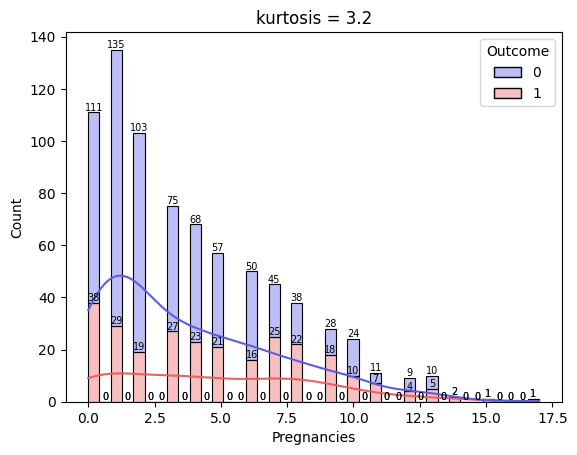

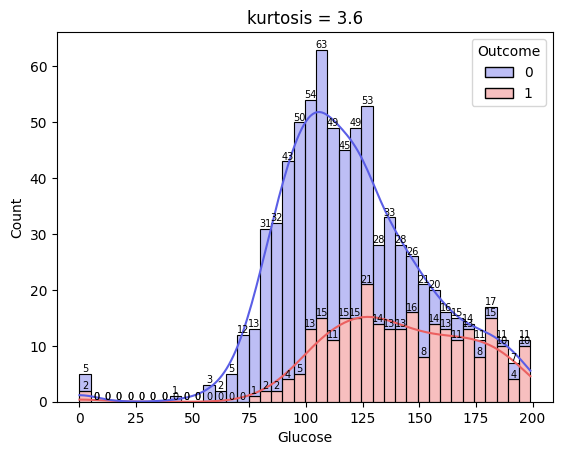

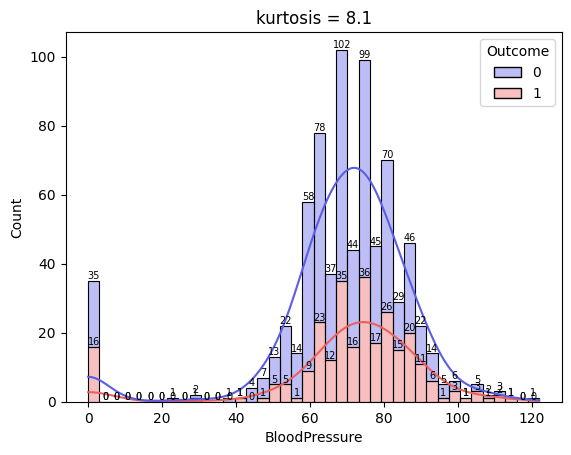

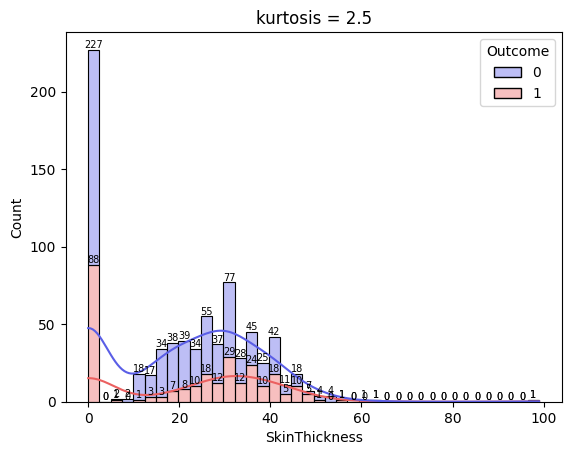

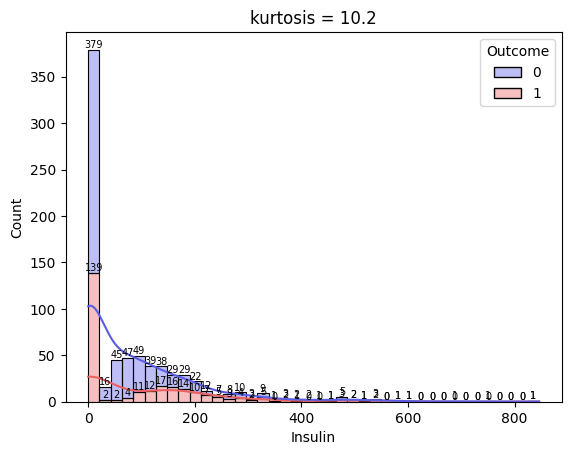

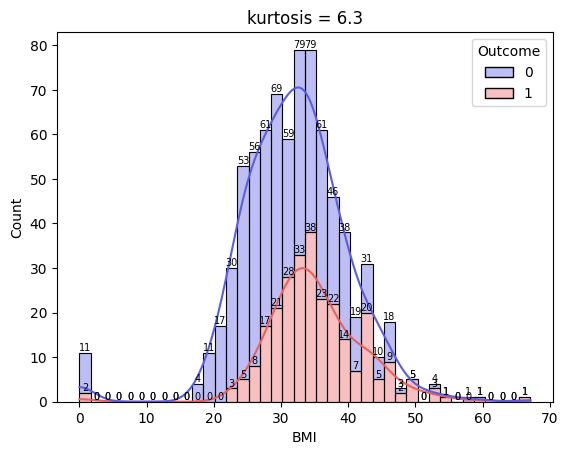

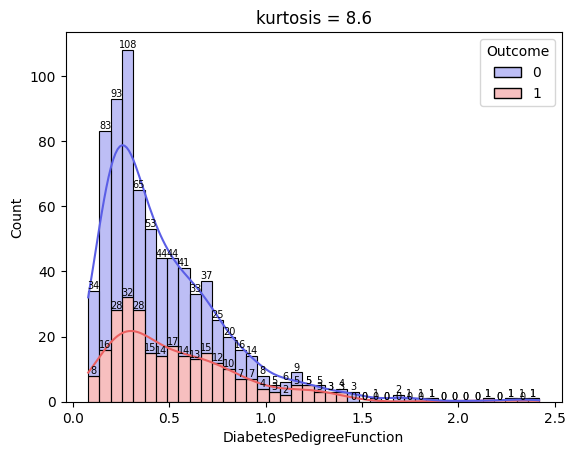

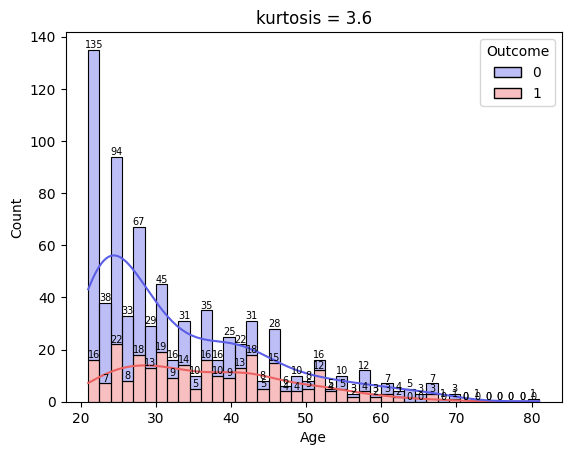

In [29]:
# Executing the function with all the Independent Variables

histogram_plot('Pregnancies')
histogram_plot('Glucose')
histogram_plot('BloodPressure')
histogram_plot('SkinThickness')
histogram_plot('Insulin')
histogram_plot('BMI')
histogram_plot('DiabetesPedigreeFunction')
histogram_plot('Age')

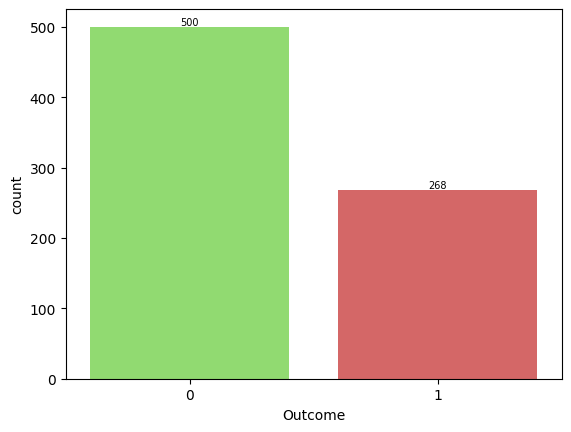

None


In [31]:
# Analyzing Outcome(y) Dependent Variable

count = sns.countplot(data = df, x = 'Outcome', hue = 'Outcome', palette = ['#8aeb60', '#e65555'],
                      legend = False)  # avoiding deprecation by adding hue and legend= False. Got warning!
count.bar_label(count.containers[0], fontsize = 7)
count.bar_label(count.containers[1], fontsize = 7)
print(plt.show())

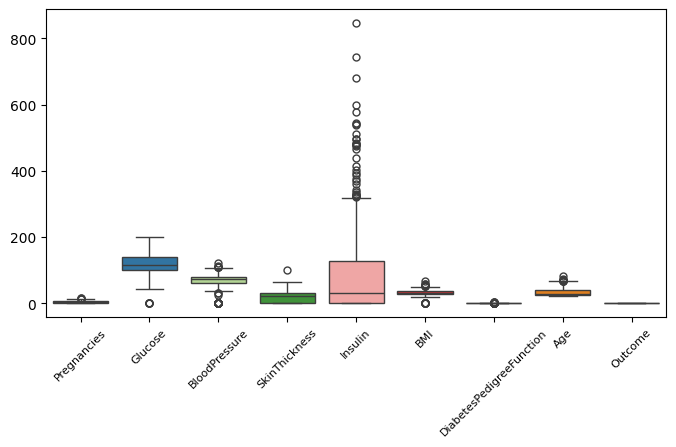

None


In [32]:
# Using boxplot to check outliers

plt.figure(figsize = (8, 4))
sns.boxplot(data = df, palette = "Paired", linewidth = 1, fliersize = 5, flierprops = {"marker": "o"})
plt.xticks(rotation = 45, fontsize = 8)
print(plt.show())

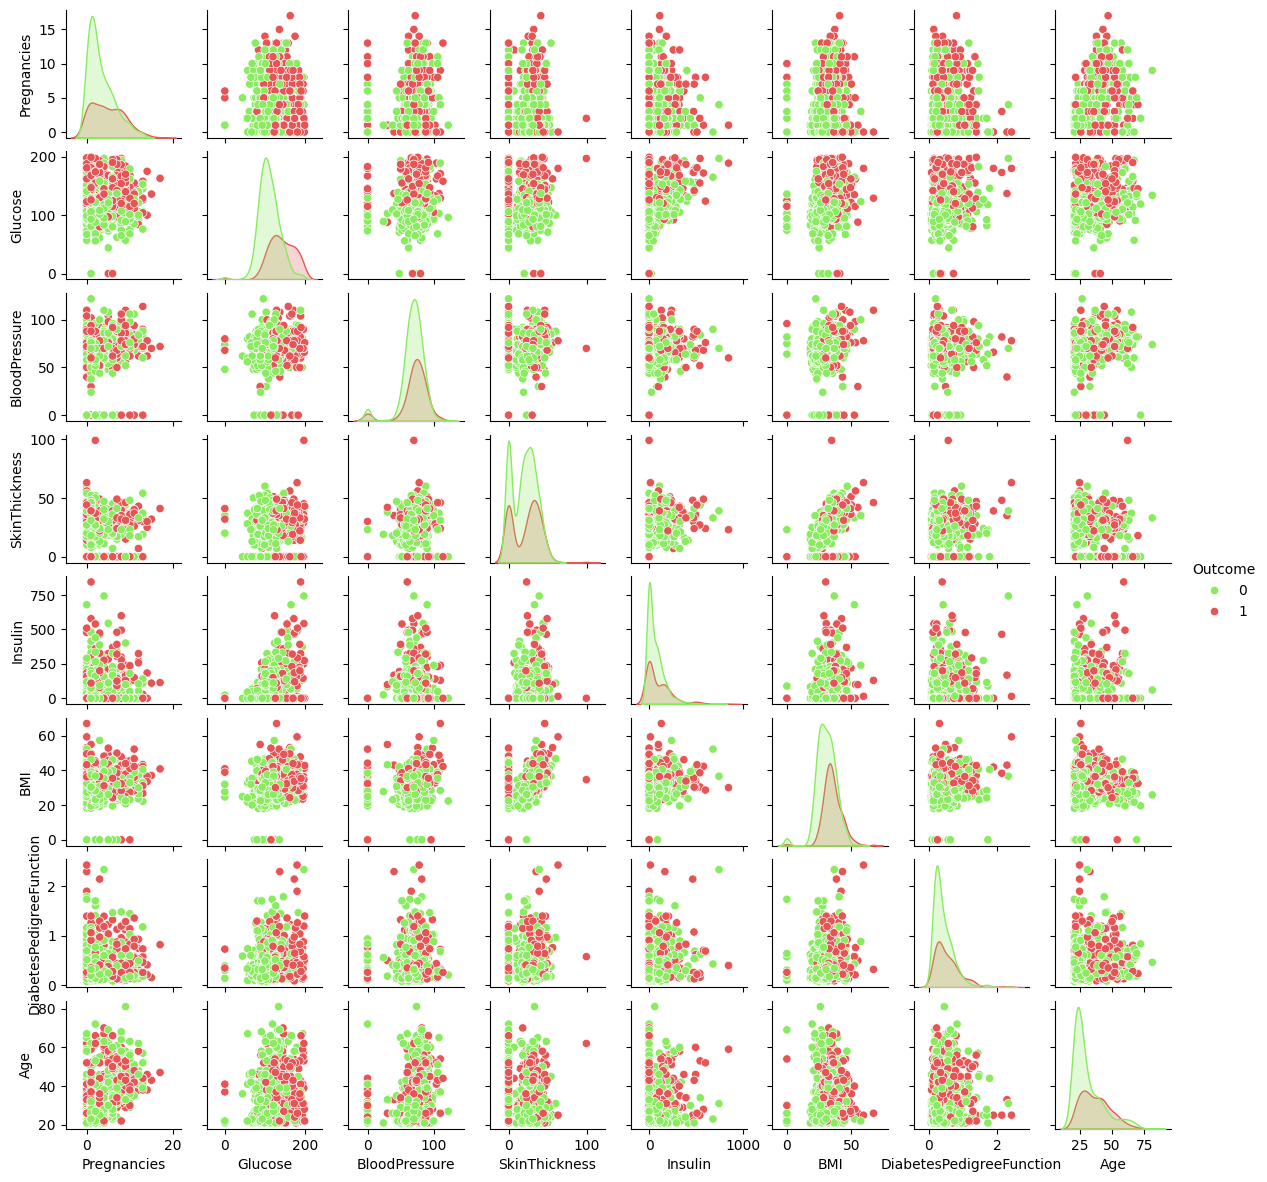

None


In [33]:
# Using Pair Plot to visualize the distribution and relations of all the variables.

sns.pairplot(df, hue = 'Outcome', height = 1.5, aspect = 1, palette = ['#8aeb60', '#e65555'])
print(plt.show())

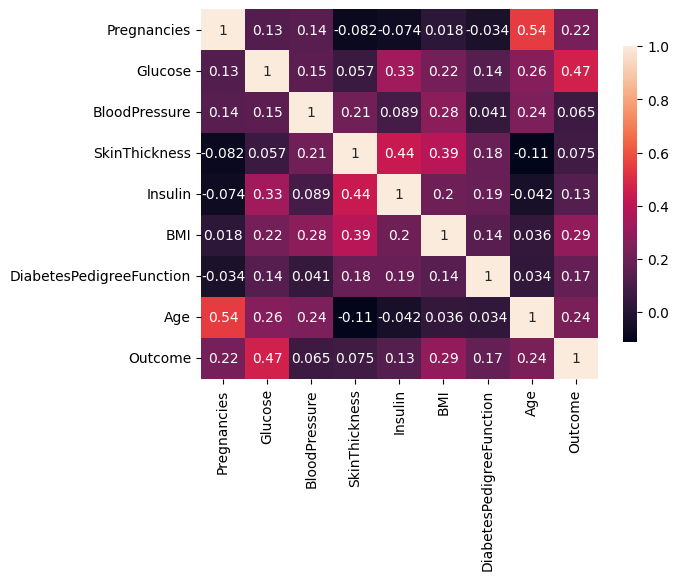

None


In [34]:
# Finding correlation between Outcome and all other variables using heatmap

sns.heatmap(df.corr(numeric_only = True),
            annot = True, cbar_kws = {
        'shrink': 0.8})  # the heatmap shows that there is a moderate correlation between outcome and glucose level.
print(plt.show())

In [35]:
# Checking for missing values

print(df.isna().sum())  # There is no missing values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [39]:
# Selecting dependent and independent variables
X = df.loc[:, ["Glucose", "BMI", "Age"]]  # DataFrame 2-Dimension
y = df['Outcome']  # Series 1-Dimension

In [40]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [42]:
# Machine Learning Model = Using support Vector Machine(SVM) as this is binary classification
model = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel = 'linear', gamma = 'scale'))])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

In [44]:
y_pred = model.predict(X_test)

In [46]:
# using f1 score to check accuracy and displaying Confusion matrix

print(f'f1_score = {f1_score(y_true = y_test, y_pred = y_pred)}')
print(f'accuracy_score = {accuracy_score(y_true = y_test, y_pred = y_pred)}')

f1_score = 0.673469387755102
accuracy_score = 0.7922077922077922


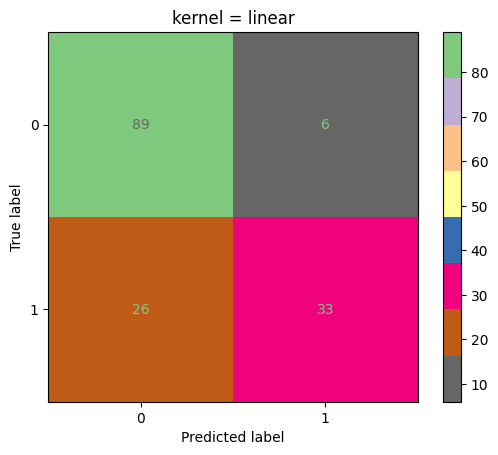

None


In [47]:
# Evaluating using ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap = "Accent_r")
plt.title("kernel = linear")
print(plt.show())